# PyTASER Examples


The examples given below use electronic structure information from the Materials Project database. They require an API key that you can get from https://materialsproject.org/open



As the database is built from density functional theory calculations using a semi-local exchange-correlation functional, the band gaps are underestimated, so we apply a scissors operator to recover the experimental bandgap in each case. This is necessary to directly compared predicted and modelled spectra.

## Setup

In [1]:
from pytaser import generator, plotter
%pylab inline

key = 'w02ir9NJsWnyZBID'  # insert your own Materias Project key
temp = 298 # temperature in Kelvin
conc = 1e18 # carrier concentration per cm3 

Populating the interactive namespace from numpy and matplotlib


## GaAs

In [7]:
bandgap = 1.5 # eV

# GaAs_generator = generator.TASGenerator.from_mpid("mp-2534", bandgap, api_key=key)
GaAs_tas = GaAs_generator.generate_tas(temp, conc)

GaAs_plotter = plotter.TASPlotter(GaAs_tas, bandgap, material_name="GaAs", temp=temp, conc=conc)

/opt/anaconda3/lib/python3.8/site-packages/pymatgen-2020.9.14-py3.8-macosx-10.9-x86_64.egg/pymatgen/electronic_structure/dos.py:1009: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp((E - fermi) / (_cd("Boltzmann constant in eV/K") * T)))
/Users/wooyoungwon/Dropbox/program/PyTASER-main/PyTASER/pytaser/plotter.py:8: RuntimeWarning: divide by zero encountered in true_divide
  wavelength = ((scpc.h * scpc.c) / (ev * scpc.electron_volt)) * 10e8


Connection established to Materials Project database, version 2020_09_08.


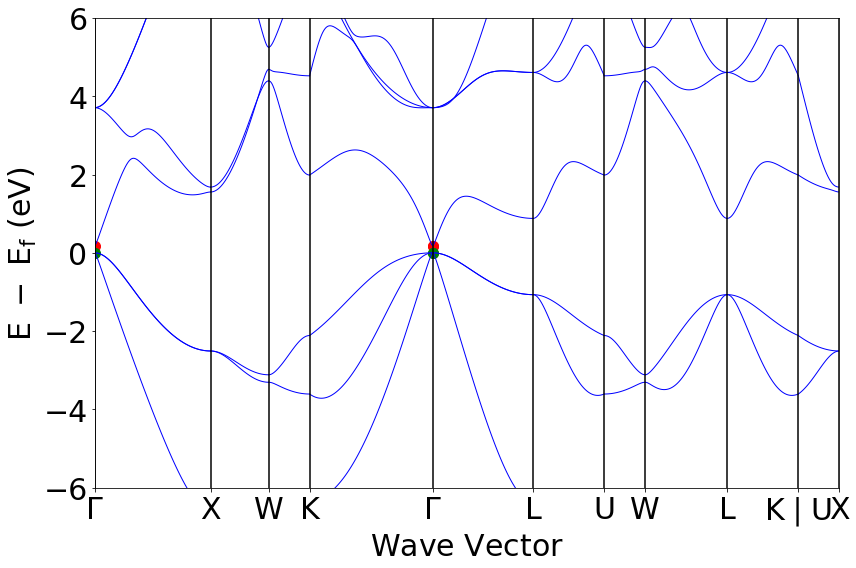

In [8]:
#Band structure read from pymatgen 
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
a = MPRester()
bs = a.get_bandstructure_by_material_id("mp-2534")

from pymatgen.electronic_structure.plotter import BSPlotter
plt = BSPlotter(bs).get_plot(vbm_cbm_marker=True,ylim=[-6,+6])

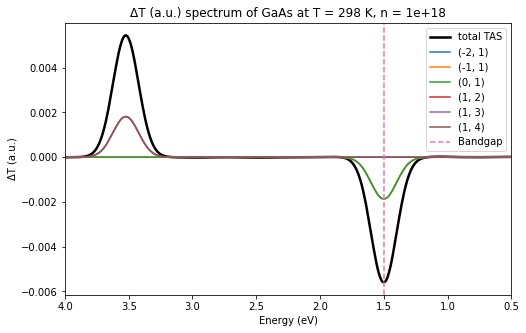

In [14]:
# Energy plot (reverse axis for better comparison)
plot2_gaas = GaAs_plotter.get_plot(
    xaxis="energy", transition_cutoff=0.03, xmin=0.5, xmax=4, yaxis="tas")
plot2_gaas.gca().invert_xaxis()

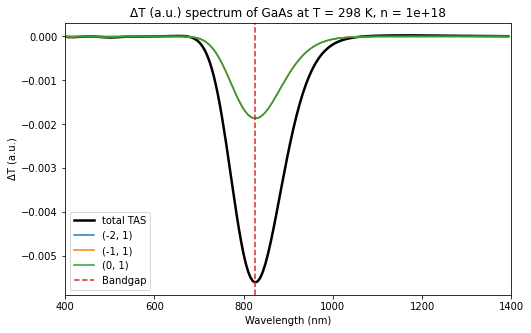

In [15]:
# Wavelength plot
plot_gaas = GaAs_plotter.get_plot(
   xaxis="wavelength", transition_cutoff=0.03, xmin=400, xmax=1400, yaxis="tas")